# **HANDWRITTEN DIGIT RECOGNITION**

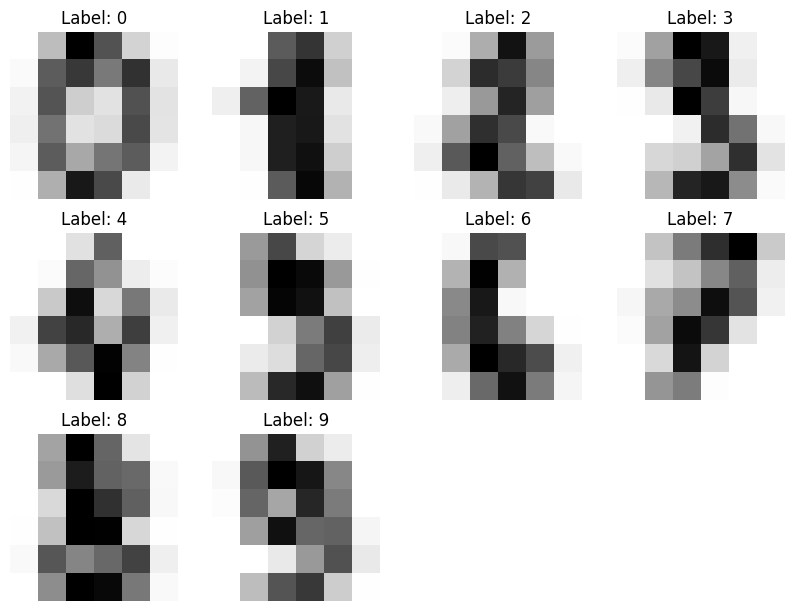

Iteration 1, loss = 2.33548725
Iteration 2, loss = 2.20945749
Iteration 3, loss = 2.07227250
Iteration 4, loss = 1.89455322
Iteration 5, loss = 1.68871273
Iteration 6, loss = 1.48484595
Iteration 7, loss = 1.29457307
Iteration 8, loss = 1.12939170
Iteration 9, loss = 0.99044762
Iteration 10, loss = 0.87558166
Iteration 11, loss = 0.78148562
Iteration 12, loss = 0.70342219
Iteration 13, loss = 0.63585465
Iteration 14, loss = 0.58010255
Iteration 15, loss = 0.53191052
Iteration 16, loss = 0.49049265
Iteration 17, loss = 0.45390761
Iteration 18, loss = 0.42223312
Iteration 19, loss = 0.39444107
Iteration 20, loss = 0.36922378
Iteration 21, loss = 0.34733833
Iteration 22, loss = 0.32746972
Iteration 23, loss = 0.30979972
Iteration 24, loss = 0.29409243
Iteration 25, loss = 0.27976971
Iteration 26, loss = 0.26647920
Iteration 27, loss = 0.25476770
Iteration 28, loss = 0.24392400
Iteration 29, loss = 0.23349207
Iteration 30, loss = 0.22431569
Iteration 31, loss = 0.21591476
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Accuracy: 0.9109159347553325
Random Forest Accuracy: 0.9234629861982434
SVM Accuracy: 0.9247176913425345
MLP Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97        79
           1       0.95      0.79      0.86        80
           2       0.97      0.99      0.98        77
           3       0.92      0.86      0.89        79
           4       0.95      0.94      0.95        83
           5       0.87      0.96      0.91        82
           6       0.94      0.99      0.96        80
           7       0.96      0.90      0.93        80
           8       0.85      0.80      0.82        76
           9       0.76      0.91      0.83        81

    accuracy                           0.91       797
   macro avg       0.92      0.91      0.91       797
weighted avg       0.92      0.91      0.91       797

Random Forest Classification Report:
               precision    recall  f1-score   support

           

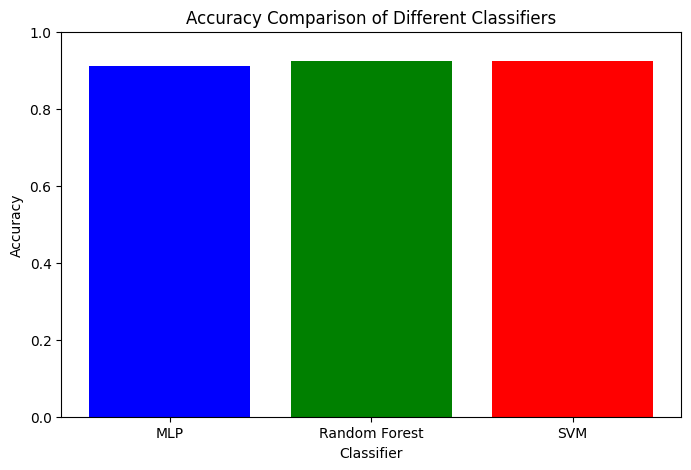

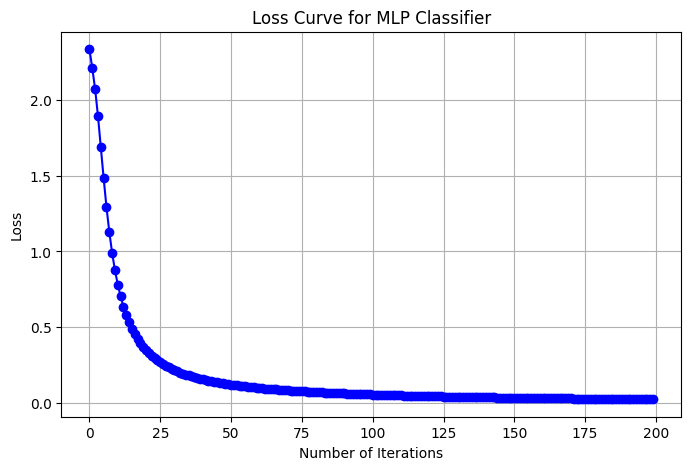

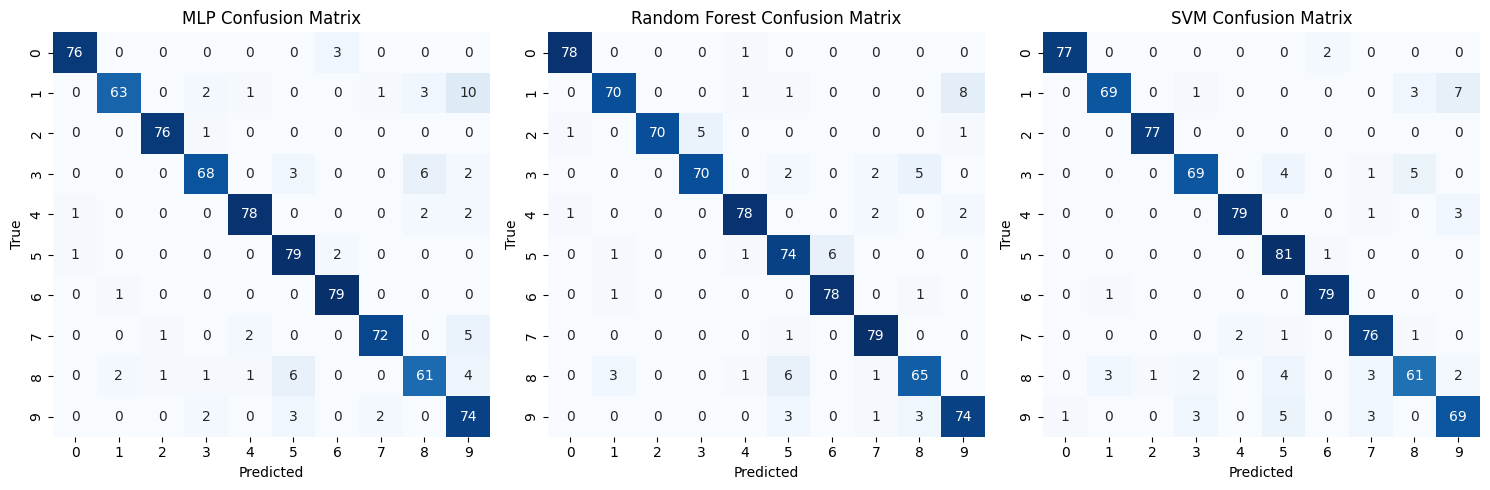

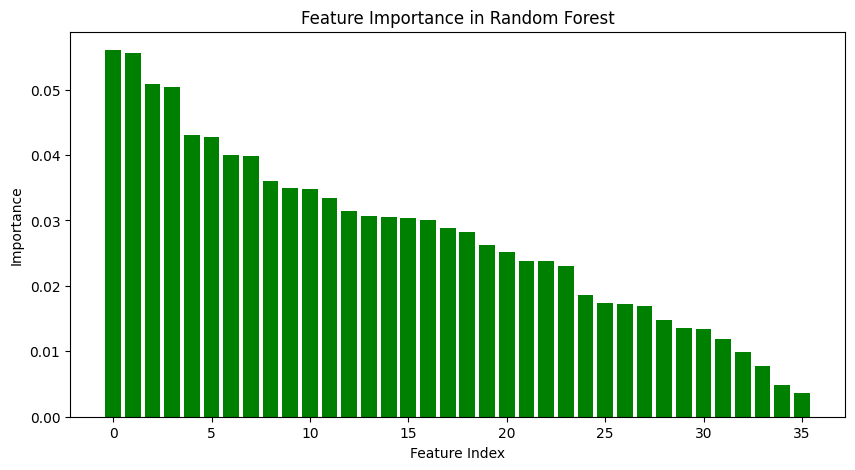

In [5]:
# Importing necessary libraries
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from skimage.transform import resize
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report



# Load the handwritten digits dataset
digits = datasets.load_digits()

# Resize the images to 6x6 pixels to retain more detail
resized_images = [resize(image, (6, 6), mode='constant', anti_aliasing=True) for image in digits.images]

# Reshape resized image data into a flat array for model training
X = [image.flatten() for image in resized_images]
y = digits.target
# Corrected function to plot digit images
def plot_digits(start_index):
    n_plots = 10
    fig = plt.figure(figsize=(10, 10))
    for j in range(n_plots):
        plt.subplot(4, 4, j+1)
        plt.imshow(resized_images[start_index + j].reshape(6, 6), cmap='binary')  # Reshape to 6x6 for correct display
        plt.title(f'Label: {digits.target[start_index + j]}')
        plt.axis('off')
    plt.show()

# Plot the first 10 resized digit images
plot_digits(0)

# Split data into training and test sets
X_train, y_train = X[:1000], y[:1000]
X_test, y_test = X[1000:], y[1000:]

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(15,), activation='logistic', alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=1, learning_rate_init=.1,
                    verbose=True)
mlp.fit(X_train, y_train)

# Initialize and train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)

# Initialize and train the Support Vector Machine classifier
svm = SVC(kernel='linear', random_state=1)
svm.fit(X_train, y_train)


# Make predictions on the test set
predictions_mlp = mlp.predict(X_test)
predictions_rf = rf.predict(X_test)
predictions_svm = svm.predict(X_test)

# Calculate and print the accuracy scores
accuracy_mlp = accuracy_score(y_test, predictions_mlp)
accuracy_rf = accuracy_score(y_test, predictions_rf)
accuracy_svm = accuracy_score(y_test, predictions_svm)
print("MLP Accuracy:", accuracy_mlp)
print("Random Forest Accuracy:", accuracy_rf)
print("SVM Accuracy:", accuracy_svm)

# Generate classification reports for each model
report_mlp = classification_report(y_test, predictions_mlp)
report_rf = classification_report(y_test, predictions_rf)
report_svm = classification_report(y_test, predictions_svm)

# Print the reports
print("MLP Classification Report:\n", report_mlp)
print("Random Forest Classification Report:\n", report_rf)
print("SVM Classification Report:\n", report_svm)

# Plot accuracy comparison
classifiers = ['MLP', 'Random Forest', 'SVM']
accuracies = [accuracy_mlp, accuracy_rf, accuracy_svm]

plt.figure(figsize=(8, 5))
plt.bar(classifiers, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Classifiers')
plt.ylim([0, 1])
plt.show()

# Plot the loss curve for MLP
plt.figure(figsize=(8, 5))
plt.plot(mlp.loss_curve_, 'o-', color='blue')
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.title("Loss Curve for MLP Classifier")
plt.grid(True)
plt.show()

# Plot confusion matrices for each classifier
plt.figure(figsize=(15, 5))

for i, (clf_name, predictions) in enumerate(zip(classifiers, [predictions_mlp, predictions_rf, predictions_svm])):
    plt.subplot(1, 3, i+1)
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'{clf_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')

plt.tight_layout()
plt.show()

# Plot feature importances for Random Forest
plt.figure(figsize=(10, 5))
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(range(len(importances)), importances[indices], color='green', align='center')
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.show()